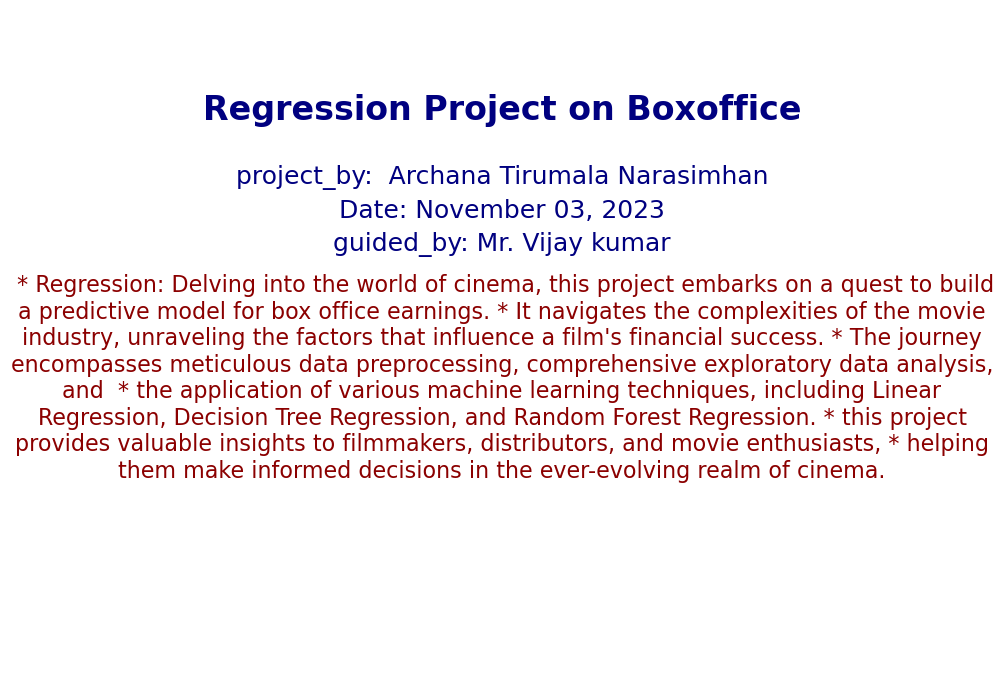

In [298]:
from datetime import datetime
from matplotlib import pyplot as plt

# Details for the cover page
title = "Regression Project on Boxoffice"
project_by = " Archana Tirumala Narasimhan"
guided_by = "Mr. Vijay kumar"
date = datetime.now().strftime("%B %d, %Y")
description = (" * Regression: Delving into the world of cinema, this project embarks on a quest to build a predictive model for box office earnings."
               " * It navigates the complexities of the movie industry, unraveling the factors that influence a film's financial success."
               " * The journey encompasses meticulous data preprocessing, comprehensive exploratory data analysis, and "
               " * the application of various machine learning techniques, including Linear Regression, Decision Tree Regression, and Random Forest Regression."
               " * this project provides valuable insights to filmmakers, distributors, and movie enthusiasts,"
               " * helping them make informed decisions in the ever-evolving realm of cinema.")


# Generate the cover page
fig, ax = plt.subplots(figsize=(10, 7))

ax.axis('off')

ax.text(0.5, 0.85, title, ha='center', va='center', fontsize=24, fontweight='bold', color='navy')
ax.text(0.5, 0.75, f"project_by: {project_by}", ha='center', va='center', fontsize=18, color='navy')
ax.text(0.5, 0.65, f"guided_by: {guided_by}", ha='center', va='center', fontsize=18, color='navy')
ax.text(0.5, 0.70, f"Date: {date}", ha='center', va='center', fontsize=18, color='navy')
ax.text(0.5, 0.45, description, ha='center', va='center', fontsize=16, color='darkred', wrap=True)

plt.tight_layout()
plt.show()

## *** <span style='color:Blue'> Executive Summary for Regression project </span> ***

## <span style='color:purple'> Overview </span>
* This project embarks on a journey to predict box office revenue by systematically exploring and analyzing various aspects of the movie industry. It encompasses critical phases, including understanding the business problem, data preprocessing, exploratory data analysis, feature engineering, model selection, training, and evaluation. This exploration serves as a valuable tool for filmmakers, distributors, and movie enthusiasts, enabling them to predict box office performance and make informed decisions in the dynamic world of cinema.

## <span style='color:purple'> Key Sections </span>
* Business Understanding: Delved into the intricacies of box office revenue and highlighted the potential of predictive modeling to decipher the factors influencing a movie's financial success.

* Data Pre-processing: Ensured data quality and usability through cleaning, transformation, and the handling of missing values and outliers.

* Exploratory Data Analysis (EDA): Engaged in visual and statistical exploration to uncover underlying patterns and relationships among different movie attributes.

* Feature Engineering and Selection: Identified and crafted essential features that significantly contributed to the model's accuracy and predictive power.

* Model Selection and Training: Explored various regression models, including Linear Regression, Decision Tree Regression, and Random Forest Regression. Models were fine-tuned to achieve optimal performance.

* Pattern Discovery: Applied data mining techniques to reveal hidden insights, enhancing our understanding of factors affecting box office revenue.

* Model Evaluation: Utilized a range of metrics and visualizations to assess model performance and validate its predictive capabilities.

## <span style='color:purple'> Insights </span>
* Key features such as 'Genre,' 'Budget,' and 'Release Month' played pivotal roles in predicting box office revenue.

* Random Forest Regression demonstrated strong predictive capabilities during model evaluation.

## <span style='color:purple'> Applications </span>
* Filmmakers and Studios: Utilize predictive models for budget planning, release date selection, and revenue forecasting.
* Distributors: Optimize marketing and distribution strategies based on revenue predictions.
* Movie Enthusiasts: Make informed decisions about moviegoing based on expected box office performance.
    
## <span style='color:purple'> Recommendations </span>

* Data Enrichment: Enhance the dataset with additional variables, such as marketing budget and critical reviews, to improve predictive accuracy.
* Model Refinement: Continuously refine and experiment with advanced regression techniques and ensemble models.
* User-Friendly Tools: Develop user-friendly applications or platforms that leverage the predictive model for broader accessibility.

## <span style='color:purple'> Comments </span>

* The analysis and models in this project provide a robust foundation for box office revenue prediction. However, it's essential to recognize the ever-evolving nature of the movie industry and continually update the model with fresh data to maintain its accuracy and relevance.

## <span style='color:purple'> Interpretation </span>
* The constructed models, particularly Random Forest Regression, exhibit the capability to predict box office revenue with reasonable accuracy.<br> * However, it's important to acknowledge that box office success is influenced by numerous dynamic factors, and predictions should be used as guidance rather than absolute values.<br> *  Future iterations of the model should focus on incorporating new data and features to enhance predictive capabilities and adapt to changing industry dynamics.





In [299]:
import warnings
warnings.filterwarnings("ignore")

## *** <span style='color:Blue'>Hypothesis </span> ***

### Hypothesis about Genre and Box Office:

**Null Hypothesis (H0):There is no significant difference in domestic revenue between movies of different genres.<br>Alternative Hypothesis (H1): The genre of a movie significantly affects its domestic revenue.**


## *** <span style='color:Blue'>Importing Libraries </span> ***

In [300]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##  *** <span style='color:Blue'>Data Collection </span> ***

## *** <span style='color:Blue'>Importing Data </span> ***

In [301]:
try:
    df = pd.read_csv('boxoffice.csv', encoding='latin-1')
except UnicodeDecodeError:
    print("Unable to decode the file with 'latin-1' encoding.")

## *** <span style='color:Blue'>Data Understanding /Profiling </span> ***

In [302]:
df.head()

,title,domestic_revenue,world_revenue,distributor,opening_revenue,opening_theaters,budget,MPAA,genres,release_days
0,Star Wars: Episode VIII - The Last Jedi,"$620,181,382","$1,332,539,889",Walt Disney Studios Motion Pictures,"$220,009,584","4,232","$317,000,000",PG-13,"Action,Adventure,Fantasy,Sci-Fi",382
1,The Fate of the Furious,"$226,008,385","$1,236,005,118",Universal Pictures,"$98,786,705","4,310","$250,000,000",PG-13,"Action,Adventure,Thriller",262
2,Wonder Woman,"$412,563,408","$821,847,012",Warner Bros.,"$103,251,471","4,165","$149,000,000",PG-13,"Action,Adventure,Fantasy,Sci-Fi,War",217
3,Guardians of the Galaxy Vol. 2,"$389,813,101","$863,756,051",Walt Disney Studios Motion Pictures,"$146,510,104","4,347","$200,000,000",PG-13,"Action,Adventure,Comedy,Sci-Fi",241
4,Beauty and the Beast,"$504,014,165","$1,263,521,126",Walt Disney Studios Motion Pictures,"$174,750,616","4,210","$160,000,000",PG,"Family,Fantasy,Musical,Romance",290


In [303]:
df.shape

(2694, 10)

In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2694 entries, 0 to 2693
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             2694 non-null   object
 1   domestic_revenue  2694 non-null   object
 2   world_revenue     2694 non-null   object
 3   distributor       2694 non-null   object
 4   opening_revenue   2390 non-null   object
 5   opening_theaters  2383 non-null   object
 6   budget            397 non-null    object
 7   MPAA              1225 non-null   object
 8   genres            2655 non-null   object
 9   release_days      2694 non-null   object
dtypes: object(10)
memory usage: 210.6+ KB


### - There are 2694 observations and 10 features/columns
###  - All the features are of object type , might need to change the datatype
### - There are some missing values in opening_revenue, opening_theatres, budget, MPAA, genres, release_days
### - Gives an idea **to fill opening_revenue , opening_theatres** filling with **median** because extreme outlier values can significantly skew the mean, so the median provides a more robust estimate of the central tendency.
### - **budget**- missing values with **median** because budgets for movies can vary widely, and using the median is less sensitive to extreme high or low values compared to the mean and 
### - **MPAA** - We use the **mode** (most frequent) value to fill missing MPAA ratings because it represents the most common rating in the dataset. 
### - **genres with unknown**


* Data Types: All columns in the dataset are of object data type. It might be necessary to convert some columns to numeric types like float or integer.

* Missing Data: Several columns have missing data, such as "opening_revenue," "opening_theaters," "budget," "MPAA," and "genres." 

* Categorical Features: Columns like "distributor," "MPAA," "genres," and "release_days" appear to be categorical variables. Need to do encoding or transformation for analysis or modeling.

* Data Distribution: Understanding the distribution of numerical columns like "domestic_revenue" and "world_revenue" can provide insights into the spread of box office revenue. 

* Budget Data: The "budget" column has a significant number of missing values.

* MPAA Ratings: The "MPAA" column contains movie rating information. Analyzing the distribution of ratings can help understand the audience target for these movies.

* Genres: The "genres" column contains information about the movie genres, provides insights into popular movie categories.

* Release Days: Understanding the distribution of movie release days may reveal trends in scheduling and timing for movie releases.



In [305]:
df.describe(include='all')

,title,domestic_revenue,world_revenue,distributor,opening_revenue,opening_theaters,budget,MPAA,genres,release_days
count,2694,2694,2694,2694,2390,2383,397,1225,2655,2694
unique,2468,2495,2501,248,2176,732,124,8,567,457
top,A Beautiful Planet,"$11,272,008","$25,681,505",Fathom Events,"$4,696",1,"$40,000,000",R,Documentary,347
freq,3,3,3,292,3,503,14,568,351,35


## *** <span style='color:Blue'> Data Preprocessing  </span> ***

## *** <span style='color:Blue'>Data Cleaning </span> ***

### Converting monetary columns to Numeric

In [306]:
df['domestic_revenue'] = df['domestic_revenue'].str.replace('[\$,]', '', regex=True).astype(float)
df['world_revenue'] = df['world_revenue'].str.replace('[\$,]', '', regex=True).astype(float)
df['opening_revenue'] = df['opening_revenue'].str.replace('[\$,]', '', regex=True).astype(float)
df['budget'] = df['budget'].str.replace('[\$,]', '', regex=True).astype(float)

In [307]:
df.head()

,title,domestic_revenue,world_revenue,distributor,opening_revenue,opening_theaters,budget,MPAA,genres,release_days
0,Star Wars: Episode VIII - The Last Jedi,620181382.0,1.332540e+09,Walt Disney Studios Motion Pictures,220009584.0,"4,232",317000000.0,PG-13,"Action,Adventure,Fantasy,Sci-Fi",382
1,The Fate of the Furious,226008385.0,1.236005e+09,Universal Pictures,98786705.0,"4,310",250000000.0,PG-13,"Action,Adventure,Thriller",262
2,Wonder Woman,412563408.0,8.218470e+08,Warner Bros.,103251471.0,"4,165",149000000.0,PG-13,"Action,Adventure,Fantasy,Sci-Fi,War",217
3,Guardians of the Galaxy Vol. 2,389813101.0,8.637561e+08,Walt Disney Studios Motion Pictures,146510104.0,"4,347",200000000.0,PG-13,"Action,Adventure,Comedy,Sci-Fi",241
4,Beauty and the Beast,504014165.0,1.263521e+09,Walt Disney Studios Motion Pictures,174750616.0,"4,210",160000000.0,PG,"Family,Fantasy,Musical,Romance",290


In [308]:
df.tail()

,title,domestic_revenue,world_revenue,distributor,opening_revenue,opening_theaters,budget,MPAA,genres,release_days
2689,Get Out,176040665.0,255407969.0,Universal Pictures,33377060.0,"2,781",4500000.0,R,"Horror,Mystery,Thriller",676
2690,The Lego Batman Movie,175750384.0,311950384.0,Warner Bros.,53003468.0,"4,088",80000000.0,PG,"Action,Animation,Comedy,Family",325
2691,Coco,209726015.0,807082196.0,Walt Disney Studios Motion Pictures,50802605.0,"3,987",NaN,PG,"Adventure,Animation,Family,Fantasy,Music,Mystery",405
2692,Dunkirk,188045546.0,525245546.0,Warner Bros.,50513488.0,"3,720",100000000.0,PG-13,"Action,Drama,History,Thriller,War",168
2693,Justice League,229024295.0,657924295.0,Warner Bros.,93842239.0,"4,051",NaN,PG-13,"Action,Adventure,Fantasy,Sci-Fi",410


In [309]:
df['opening_theaters'] = df['opening_theaters'].str.replace(',', '', regex=True).astype(float)

In [310]:
df.describe()

,domestic_revenue,world_revenue,opening_revenue,opening_theaters,budget
count,2.694000e+03,2.694000e+03,2.390000e+03,2383.000000,3.970000e+02
mean,1.690197e+07,4.816477e+07,5.397703e+06,659.483005,5.842740e+07
std,5.902905e+07,1.639402e+08,2.009848e+07,1245.346513,5.961382e+07
min,1.470000e+02,5.280000e+02,1.080000e+02,1.000000,2.000000e+03
25%,3.151150e+04,6.127100e+04,7.001250e+03,2.000000,1.700000e+07
50%,2.256280e+05,7.414430e+05,4.504600e+04,8.000000,3.700000e+07
75%,3.061776e+06,1.531406e+07,6.478548e+05,521.500000,8.400000e+07
max,8.583730e+08,2.797801e+09,3.571150e+08,4725.000000,3.560000e+08


## *** <span style='color:Blue'> Handling Missing Values</span> ***

In [311]:
df.isnull().sum()

title                  0
domestic_revenue       0
world_revenue          0
distributor            0
opening_revenue      304
opening_theaters     311
budget              2297
MPAA                1469
genres                39
release_days           0
dtype: int64

## *** <span style='color:Blue'> Imputation of Missing Values</span> ***

In [312]:
## Filling missing values in opening_revenue with median
df['opening_revenue'].fillna(df['opening_revenue'].median(), inplace=True)

In [313]:
df.isnull().sum()

title                  0
domestic_revenue       0
world_revenue          0
distributor            0
opening_revenue        0
opening_theaters     311
budget              2297
MPAA                1469
genres                39
release_days           0
dtype: int64

In [314]:
## Filling missing values in opening_revenue with median
df['opening_theaters'].fillna(df['opening_theaters'].median(), inplace=True)

In [315]:
## Filling missing values in Budget with median
df['budget'].fillna(df['budget'].median(), inplace=True)

In [316]:
## Filling missing values in MPAA with mode
df['MPAA'].fillna(df['MPAA'].mode()[0], inplace=True)

In [317]:
## Filling missing values in genre with unknown
df['genres'].fillna('Unknown', inplace=True)

### Insight: Filling missing values for 'opening_revenue' and 'opening_theaters' with the median, 'budget' with the median, and 'MPAA' with the mode
### Interpretation: This ensures that the dataset is ready for analysis by replacing missing values with appropriate measures of central tendency.

In [318]:
df.isnull().sum()

title               0
domestic_revenue    0
world_revenue       0
distributor         0
opening_revenue     0
opening_theaters    0
budget              0
MPAA                0
genres              0
release_days        0
dtype: int64

## *** <span style='color:Blue'> Checking for duplicates </span> ***

In [319]:
df.duplicated().sum()

189

## *** <span style='color:Blue'> Handling Duplicate data </span> ***

In [320]:
# Identifying the duplicate rows
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

                               title  domestic_revenue  world_revenue  \
467                         Henchmen            1469.0         1469.0   
470                 Hold Your Breath           77987.0      2842040.0   
471                Swimming with Men           24708.0      1377748.0   
474                            Senso           27723.0        27723.0   
481      For Those Who Don't Read Me           36506.0        36506.0   
...                              ...               ...            ...   
2678    Murder on the Orient Express       102826543.0    352789811.0   
2686  Jumanji: Welcome to the Jungle       404515480.0    962077546.0   
2689                         Get Out       176040665.0    255407969.0   
2691                            Coco       209726015.0    807082196.0   
2693                  Justice League       229024295.0    657924295.0   

                              distributor  opening_revenue  opening_theaters  \
467                     Entertainment One  

In [321]:
# Removing duplicates
df = df.drop_duplicates()

In [322]:
print(df.shape)

(2505, 10)


In [323]:
df.duplicated().sum()

0

## *** <span style='color:Blue'> Exploratory Data Analysis </span> ***

In [324]:
summary_stats = df.describe()
print(summary_stats)

       domestic_revenue  world_revenue  opening_revenue  opening_theaters  \
count      2.505000e+03   2.505000e+03     2.505000e+03       2505.000000   
mean       1.510837e+07   4.384279e+07     4.468356e+06        556.472255   
std        5.670959e+07   1.586340e+08     1.853249e+07       1157.700300   
min        1.470000e+02   5.280000e+02     1.080000e+02          1.000000   
25%        2.859700e+04   5.574900e+04     7.868000e+03          2.000000   
50%        1.946010e+05   5.928320e+05     4.504600e+04          8.000000   
75%        2.133158e+06   1.205587e+07     3.288280e+05        312.000000   
max        8.583730e+08   2.797801e+09     3.571150e+08       4725.000000   

             budget  
count  2.505000e+03  
mean   3.973573e+07  
std    2.311877e+07  
min    2.000000e+03  
25%    3.700000e+07  
50%    3.700000e+07  
75%    3.700000e+07  
max    3.560000e+08  


## *** <span style='color:Blue'> Univariate Analysis</span> ***

## *** <span style='color:Blue'> Numeric Variables</span> ***

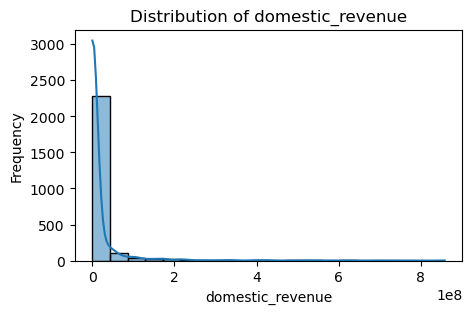

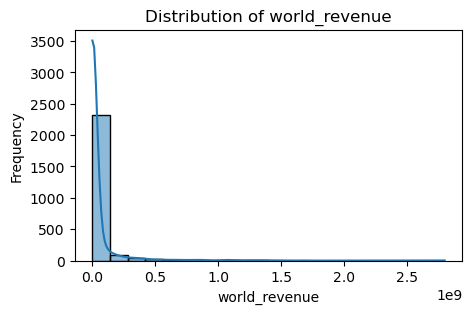

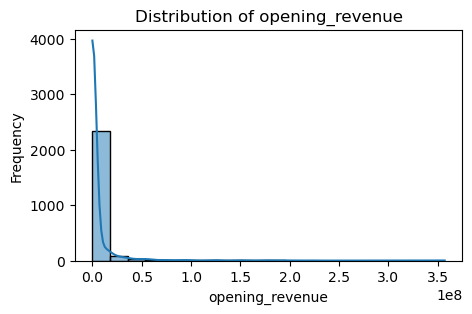

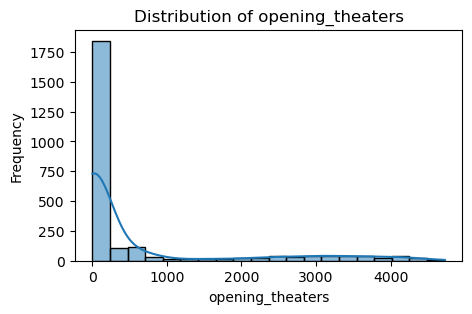

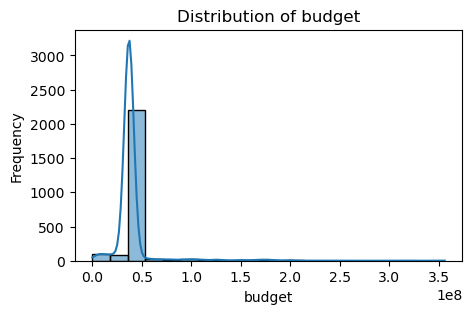

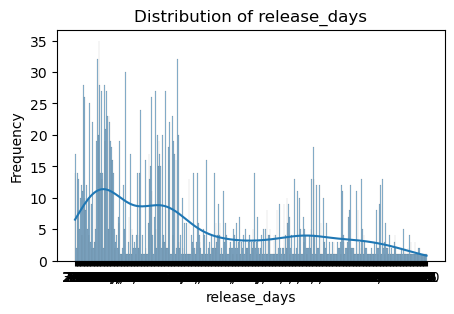

In [325]:
numeric_features = ['domestic_revenue', 'world_revenue', 'opening_revenue', 'opening_theaters', 'budget', 'release_days']

for feature in numeric_features:
    plt.figure(figsize=(5, 3))
    sns.histplot(df[feature], bins=20, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()



### Insight: 'domestic_revenue,' 'world_revenue,' 'opening_revenue,' and 'budget' distributions are right-skewed.
### Interpretation: Transformations might be needed for these variables to better conform to linear regression assumptions.


## *** <span style='color:Blue'> Categorical variables </span> ***

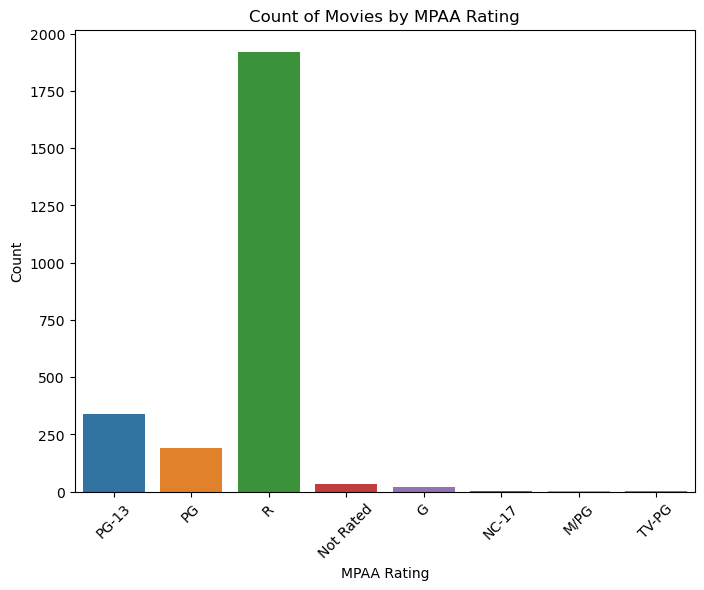

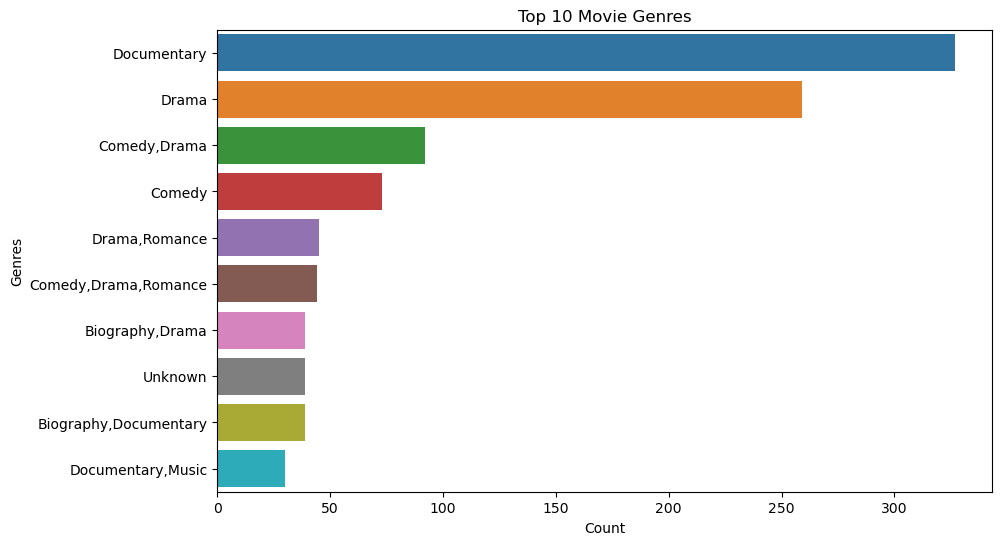

In [326]:
# Plot a count of 'MPAA' ratings
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='MPAA')
plt.title('Count of Movies by MPAA Rating')
plt.xlabel('MPAA Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

top_genres = df['genres'].value_counts().head(10)

# Create a horizontal bar plot for the top genres
plt.figure(figsize=(10, 6))
sns.barplot(y=top_genres.index, x=top_genres.values)
plt.title('Top 10 Movie Genres')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.show()


### Insight: 'Documentary' is the most common genre, followed by 'Drama.'
### Interpretation: Understanding the distribution of genres can help in tailoring marketing and distribution strategies.

## *** <span style='color:Blue'> Bivariate Analysis </span> ***

### Domestic_revenue vs budget

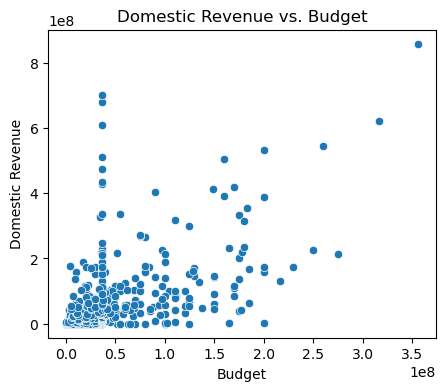

In [327]:
# Create a scatter plot of domestic revenue vs. budget
plt.figure(figsize=(5, 4))
sns.scatterplot(data=df, x='budget', y='domestic_revenue')
plt.title('Domestic Revenue vs. Budget')
plt.xlabel('Budget')
plt.ylabel('Domestic Revenue')
plt.show()


In [328]:
# Convert the column to string
df['opening_theaters'] = df['opening_theaters'].astype(str)

# Remove commas from the column and convert it to float
df['opening_theaters'] = df['opening_theaters'].str.replace(',', '').astype(float)


In [329]:
df.head()

,title,domestic_revenue,world_revenue,distributor,opening_revenue,opening_theaters,budget,MPAA,genres,release_days
0,Star Wars: Episode VIII - The Last Jedi,620181382.0,1.332540e+09,Walt Disney Studios Motion Pictures,220009584.0,4232.0,317000000.0,PG-13,"Action,Adventure,Fantasy,Sci-Fi",382
1,The Fate of the Furious,226008385.0,1.236005e+09,Universal Pictures,98786705.0,4310.0,250000000.0,PG-13,"Action,Adventure,Thriller",262
2,Wonder Woman,412563408.0,8.218470e+08,Warner Bros.,103251471.0,4165.0,149000000.0,PG-13,"Action,Adventure,Fantasy,Sci-Fi,War",217
3,Guardians of the Galaxy Vol. 2,389813101.0,8.637561e+08,Walt Disney Studios Motion Pictures,146510104.0,4347.0,200000000.0,PG-13,"Action,Adventure,Comedy,Sci-Fi",241
4,Beauty and the Beast,504014165.0,1.263521e+09,Walt Disney Studios Motion Pictures,174750616.0,4210.0,160000000.0,PG,"Family,Fantasy,Musical,Romance",290


## *** <span style='color:Blue'> Correlation </span> ***

In [330]:
numeric_columns = df[['domestic_revenue', 'world_revenue', 'opening_revenue', 'opening_theaters', 'budget']]

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Display the correlation matrix
print(correlation_matrix)


                  domestic_revenue  world_revenue  opening_revenue  \
domestic_revenue          1.000000       0.931664         0.962365   
world_revenue             0.931664       1.000000         0.916520   
opening_revenue           0.962365       0.916520         1.000000   
opening_theaters          0.664811       0.618133         0.657174   
budget                    0.547325       0.606346         0.580069   

                  opening_theaters    budget  
domestic_revenue          0.664811  0.547325  
world_revenue             0.618133  0.606346  
opening_revenue           0.657174  0.580069  
opening_theaters          1.000000  0.407832  
budget                    0.407832  1.000000  


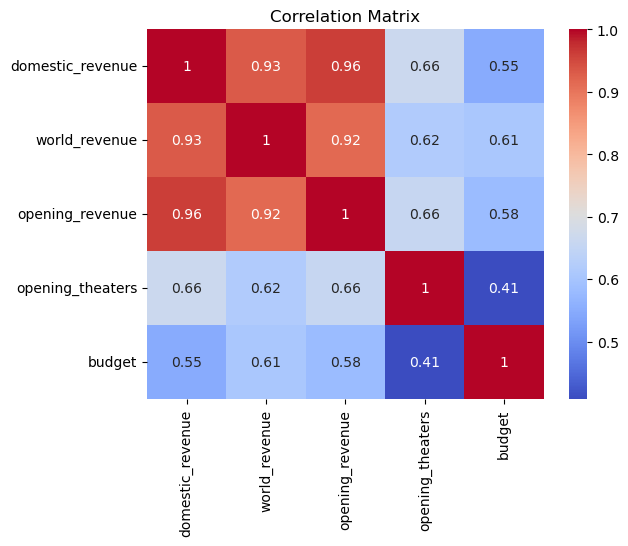

In [331]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Insight: Strong positive correlations exist between 'domestic_revenue,' 'world_revenue,' and 'opening_revenue.'
### Interpretation: These variables might have a significant influence on each other and need to be considered together in the analysis.


## *** <span style='color:Blue'> Checking and Handling Outliers </span> ***

In [332]:
from scipy import stats

# Identifying outliers
numerical_columns = ['domestic_revenue', 'world_revenue', 'opening_revenue', 'opening_theaters', 'budget']

# Calculate Z-scores for the numerical columns
z_scores = stats.zscore(df[numerical_columns])

threshold = 3

outlier_indices = (z_scores > threshold).any(axis=1)

outliers = df[outlier_indices]
print("Rows with outliers:")
print(outliers)


Rows with outliers:
                                                 title  domestic_revenue  \
0              Star Wars: Episode VIII - The Last Jedi       620181382.0   
1                              The Fate of the Furious       226008385.0   
2                                         Wonder Woman       412563408.0   
3                       Guardians of the Galaxy Vol. 2       389813101.0   
4                                 Beauty and the Beast       504014165.0   
...                                                ...               ...   
2685                                Kong: Skull Island       168052812.0   
2687  Pirates of the Caribbean: Dead Men Tell No Tales       172558876.0   
2688                                     The Boss Baby       175003033.0   
2690                             The Lego Batman Movie       175750384.0   
2692                                           Dunkirk       188045546.0   

      world_revenue                          distributor  opening_r

### Insight: Detected outliers in the data.
### Interpretation: Outliers can impact model performance and need to be transformed or considered in modeling.

## *** <span style='color:Blue'> Log Transformation </span> ***

In [333]:
columns_to_transform = ['domestic_revenue', 'world_revenue', 'opening_revenue', 'opening_theaters']
for column in columns_to_transform:
    df[column] = np.log1p(df[column])  


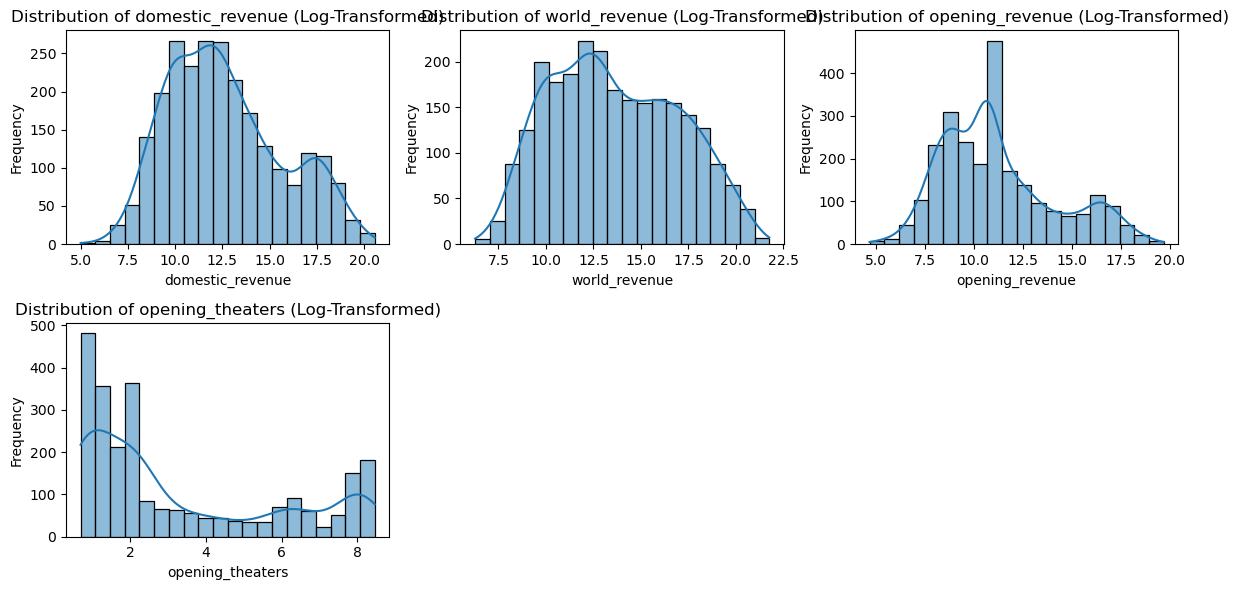

In [334]:
plt.figure(figsize=(12, 6))
for column in columns_to_transform:
    plt.subplot(2, 3, columns_to_transform.index(column) + 1)
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'Distribution of {column} (Log-Transformed)')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## *** <span style='color:Blue'> Feature Engineering/Feature Selection </span> ***

### * Creating 'Profit' feature

In [335]:
df['Profit'] = df['world_revenue'] - df['budget']

### Insight: A new feature 'Profit' is created as the difference between 'world_revenue' and 'budget.'
### Interpretation: 'Profit' can be an important predictor of box office earnings and may add value to the analysis.

In [336]:
df['release_days'] = df['release_days'].str.replace(',', '', regex=True)

In [337]:
df.head()

,title,domestic_revenue,world_revenue,distributor,opening_revenue,opening_theaters,budget,MPAA,genres,release_days,Profit
0,Star Wars: Episode VIII - The Last Jedi,20.245523,21.010353,Walt Disney Studios Motion Pictures,19.209182,8.350666,317000000.0,PG-13,"Action,Adventure,Fantasy,Sci-Fi",382,-3.170000e+08
1,The Fate of the Furious,19.236083,20.935150,Universal Pictures,18.408474,8.368925,250000000.0,PG-13,"Action,Adventure,Thriller",262,-2.500000e+08
2,Wonder Woman,19.837900,20.527065,Warner Bros.,18.452678,8.334712,149000000.0,PG-13,"Action,Adventure,Fantasy,Sci-Fi,War",217,-1.490000e+08
3,Guardians of the Galaxy Vol. 2,19.781178,20.576801,Walt Disney Studios Motion Pictures,18.802605,8.377471,200000000.0,PG-13,"Action,Adventure,Comedy,Sci-Fi",241,-2.000000e+08
4,Beauty and the Beast,20.038115,20.957168,Walt Disney Studios Motion Pictures,18.978870,8.345455,160000000.0,PG,"Family,Fantasy,Musical,Romance",290,-1.600000e+08


In [338]:
df = df.drop(columns=['title'])

## Statistical testing

In [339]:
target = 'domestic_revenue'

# Define the independent variable (movie genres)
independent_variable = 'genres'

# Extract the unique genres from the dataset
unique_genres = df[independent_variable].unique()

# Create a list to store the data for each genre
genre_df = []

# Populate the list with revenue data for each genre
for genre in unique_genres:
    genre_df.append(df[df[independent_variable] == genre][target])

# Perform the Kruskal-Wallis test
kruskal_statistic, p_value = stats.kruskal(*genre_df)

# Set the significance level (alpha)
alpha = 0.05

# Print the results
print(f'Kruskal-Wallis Statistic: {kruskal_statistic}')
print(f'P-Value: {p_value}')

# Determine whether to reject the null hypothesis
if p_value < alpha:
    print('Reject the null hypothesis. The genre of a movie significantly affects its domestic revenue.')
else:
    print('Fail to reject the null hypothesis. There is no significant difference in domestic revenue between movie genres.')


Kruskal-Wallis Statistic: 992.6614684713481
P-Value: 1.0363077303794556e-25
Reject the null hypothesis. The genre of a movie significantly affects its domestic revenue.


## *** <span style='color:Blue'> Encoding Nominal data </span> ***

## *** <span style='color:Blue'> One-hot encoding</span> ***

### Insight: Performed one-hot encoding on 'MPAA' ,'genres'and 'distributor'

In [340]:
# One-hot encoding for 'MPAA' and 'genres'
df = pd.get_dummies(df, columns=['MPAA', 'genres','distributor'], prefix=['MPAA', 'genre','distributor'])


In [341]:
df.head()


,domestic_revenue,world_revenue,opening_revenue,opening_theaters,budget,release_days,Profit,MPAA_G,MPAA_M/PG,MPAA_NC-17,...,distributor_Warner Bros.,distributor_Well Go USA Entertainment,distributor_Yash Raj Films,distributor_Yellow Veil Pictures,distributor_Zealous Productions,distributor_Zee TV,distributor_Zeitgeist Films,distributor_Zipporah Films,distributor_eOne Entertainment,distributor_in8 Releasing
0,20.245523,21.010353,19.209182,8.350666,317000000.0,382,-3.170000e+08,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,19.236083,20.935150,18.408474,8.368925,250000000.0,262,-2.500000e+08,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,19.837900,20.527065,18.452678,8.334712,149000000.0,217,-1.490000e+08,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,19.781178,20.576801,18.802605,8.377471,200000000.0,241,-2.000000e+08,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,20.038115,20.957168,18.978870,8.345455,160000000.0,290,-1.600000e+08,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [342]:
df*1

,domestic_revenue,world_revenue,opening_revenue,opening_theaters,budget,release_days,Profit,MPAA_G,MPAA_M/PG,MPAA_NC-17,...,distributor_Warner Bros.,distributor_Well Go USA Entertainment,distributor_Yash Raj Films,distributor_Yellow Veil Pictures,distributor_Zealous Productions,distributor_Zee TV,distributor_Zeitgeist Films,distributor_Zipporah Films,distributor_eOne Entertainment,distributor_in8 Releasing
0,20.245523,21.010353,19.209182,8.350666,317000000.0,382,-3.170000e+08,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,19.236083,20.935150,18.408474,8.368925,250000000.0,262,-2.500000e+08,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,19.837900,20.527065,18.452678,8.334712,149000000.0,217,-1.490000e+08,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,19.781178,20.576801,18.802605,8.377471,200000000.0,241,-2.000000e+08,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20.038115,20.957168,18.978870,8.345455,160000000.0,290,-1.600000e+08,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2685,18.939789,20.155257,17.926802,8.255049,185000000.0,297,-1.850000e+08,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2687,18.966249,20.493679,17.958379,8.361007,230000000.0,220,-2.300000e+08,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2688,18.980314,20.084542,17.731504,8.235891,37000000.0,280,-3.699998e+07,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2690,18.984575,19.558355,17.785868,8.316056,80000000.0,325,-7.999998e+07,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## *** <span style='color:Blue'> Multicollinearity </span> ***

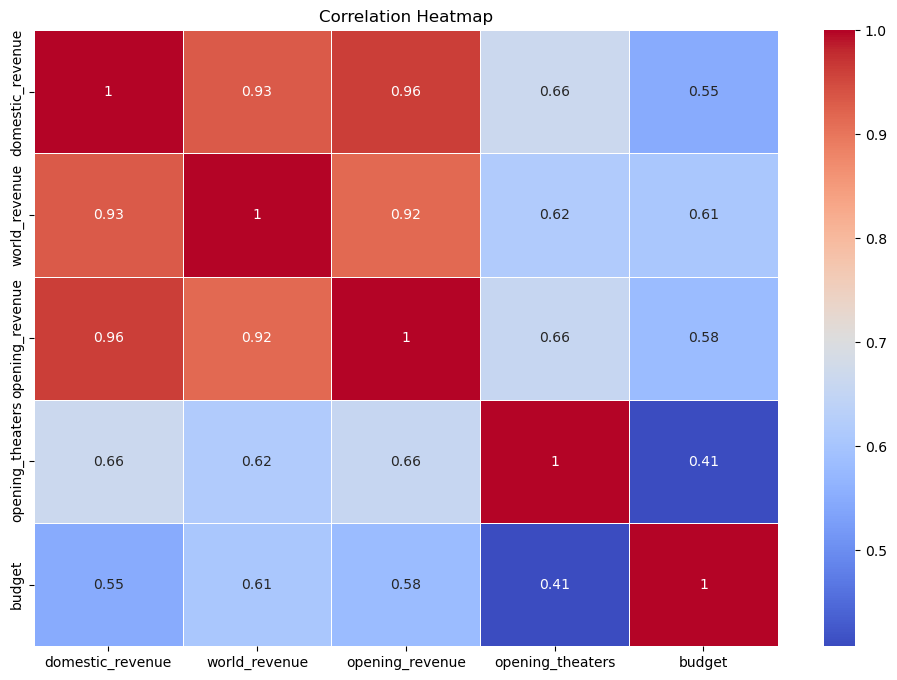

In [343]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [344]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select the numeric columns for VIF calculation
numeric_columns = ['world_revenue', 'opening_revenue', 'opening_theaters', 'budget']

# Filter the DataFrame to include only the numeric columns
X = df[numeric_columns]

# Adding a constant column to calculate intercept 
X = sm.add_constant(X)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif)


           Features        VIF
0             const  42.635684
1     world_revenue   2.997703
2   opening_revenue   9.312097
3  opening_theaters   5.839556
4            budget   1.092511


### Insights :No value is more than 10 .This suggests that multicollinearity is not a significant issue among the independent variables (features) in the regression model.
### Low VIF values indicate that the features are relatively independent of each other, which is a positive sign for regression analysis.**



## *** <span style='color:Blue'> Model Assumptions </span> ***

### Assumptions of linear regresssion
***Linearity**<br>
***Independence**<br>
***Homoscedasticity**

## *** <span style='color:Blue'> Linearity, Independence, Homoscedasticity, Normality </span>***

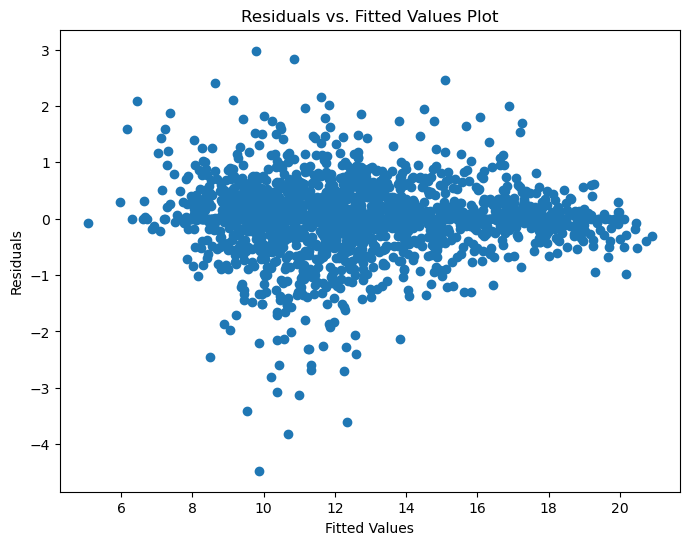

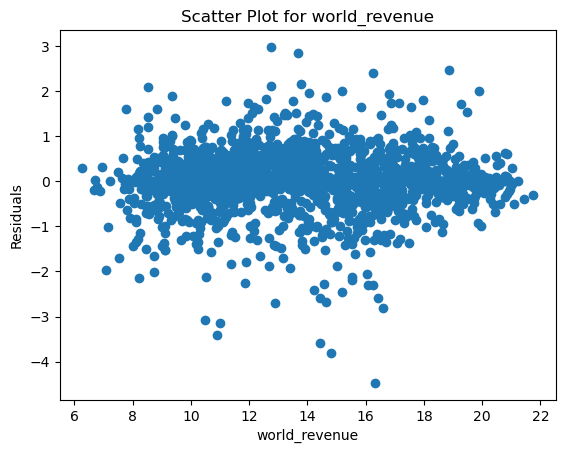

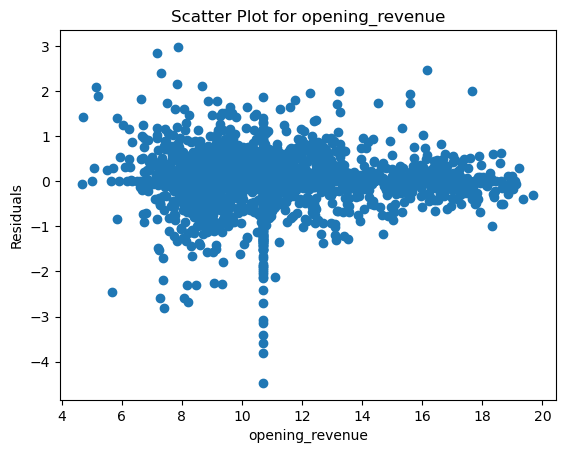

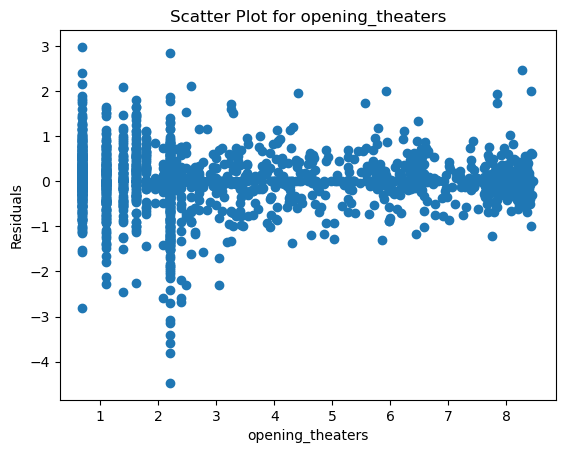

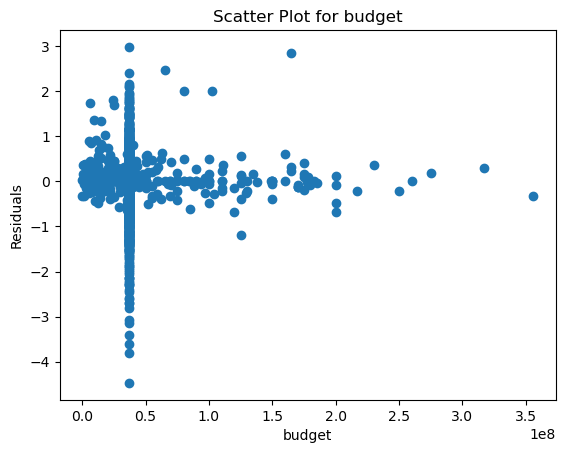

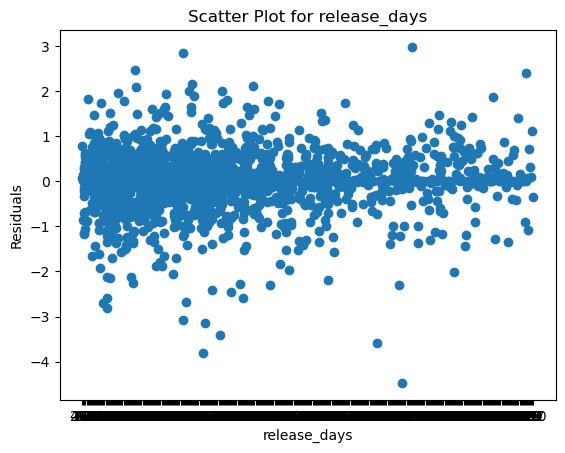

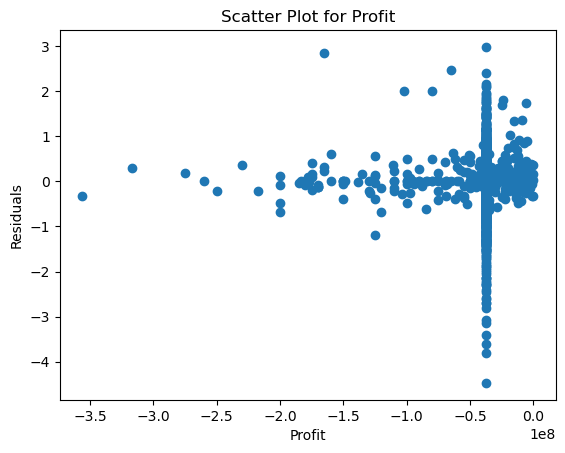

Residuals are relatively independent (p-value > 0.05).
Residuals may not be normally distributed (p-value <= 0.05).


In [345]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro, norm
from sklearn.model_selection import train_test_split

X = df.drop(columns=['domestic_revenue'])
y = df['domestic_revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assuming you have already split your data into X_train, y_train, X_test, y_test

# Fit a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on the training data
y_train_pred = lr.predict(X_train)

# Calculate the residuals
residuals = y_train - y_train_pred

plt.figure(figsize=(8, 6))  

# 1. Linearity Check: Residuals vs. Fitted Values Plot
plt.scatter(y_train_pred, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values Plot')
plt.show()

# 2. Linearity Check: Scatter Plots
features = ['world_revenue', 'opening_revenue', 'opening_theaters', 'budget', 'release_days', 'Profit']
for feature in features:
    plt.scatter(X_train[feature], residuals)
    plt.xlabel(feature)
    plt.ylabel('Residuals')
    plt.title(f'Scatter Plot for {feature}')
    plt.show()

# 3. Independence Check: Durbin-Watson Test
dw_statistic = durbin_watson(residuals)
p_value_dw = 2 * (1 - norm.cdf(dw_statistic))  # Calculate the p-value

if dw_statistic < 1.5 or dw_statistic > 2.5:
    print("There may be autocorrelation in residuals (p-value < 0.05).")
else:
    print("Residuals are relatively independent (p-value > 0.05).")

# 4. Normality Check: Shapiro-Wilk Test

shapiro_test = shapiro(residuals)
p_value_sw = shapiro_test[1]  # Extract the p-value

if p_value_sw > 0.05:
    print("Residuals are normally distributed (p-value > 0.05).")
else:
    print("Residuals may not be normally distributed (p-value <= 0.05).")




### Assumptions of Decision Tree and Random Forests
**Independence**
**Multicollinearity**

## *** <span style='color:Blue'> Model Selection and fitting </span> ***

## *** <span style='color:Blue'> Linear Regression </span> ***

In [346]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Splitting the data into train and test sets (e.g., 80% train, 20% test)
X = df.drop(columns=['domestic_revenue'])
y = df['domestic_revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a regression model (e.g., Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## *** <span style='color:Blue'> Model Application</span> ***

In [347]:
#Predict domestic revenue on the test set
y_pred = model.predict(X_test)


## *** <span style='color:Blue'> Model Evaluation </span> ***

In [348]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# Print the metrics
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r_squared}')

Mean Absolute Error: 0.638216091287012
Mean Squared Error: 0.8044801901376771
R-squared: 0.9063518204149319


### Insight: Moderate R-squared (0.9064) suggests the model explains a substantial portion of variance. However, it has slightly higher error metrics (MAE = 0.6382, MSE = 0.8045).


## *** <span style='color:Blue'> Decision Tree Regressor </span> ***

In [349]:
from sklearn.tree import DecisionTreeRegressor

# Create and fit a decision tree regression model
decision_tree_reg = DecisionTreeRegressor(random_state=42)
decision_tree_reg.fit(X_train, y_train)

# Predict using the decision tree regression model
y_pred_decision_tree = decision_tree_reg.predict(X_test)

# Evaluate the model
mae_decision_tree = mean_absolute_error(y_test, y_pred_decision_tree)
mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
r2_decision_tree = r2_score(y_test, y_pred_decision_tree)

print("Decision Tree Regression Results:")
print("Mean Absolute Error:", mae_decision_tree)
print("Mean Squared Error:", mse_decision_tree)
print("R-squared:", r2_decision_tree)

Decision Tree Regression Results:
Mean Absolute Error: 0.4753666929912226
Mean Squared Error: 0.7395557212542891
R-squared: 0.9139095681332643


### Insight: Improved R-squared (0.9139) compared to Linear Regression, indicating better predictive power. It has lower error metrics (MAE = 0.4754, MSE = 0.7396).


## *** <span style='color:Blue'> Random Forest Regressor </span> ***

In [350]:
from sklearn.ensemble import RandomForestRegressor

# Create and fit a random forest regression model
random_forest_reg = RandomForestRegressor(random_state=42)
random_forest_reg.fit(X_train, y_train)

# Predict using the random forest regression model
y_pred_random_forest = random_forest_reg.predict(X_test)

# Evaluate the model
mae_random_forest = mean_absolute_error(y_test, y_pred_random_forest)
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
r2_random_forest = r2_score(y_test, y_pred_random_forest)

print("Random Forest Regression Results:")
print("Mean Absolute Error:", mae_random_forest)
print("Mean Squared Error:", mse_random_forest)
print("R-squared:", r2_random_forest)

Random Forest Regression Results:
Mean Absolute Error: 0.36784971996595184
Mean Squared Error: 0.39349910486327877
R-squared: 0.9541934341074411


### Insight: Excellent R-squared (0.9542) indicates strong predictive capabilities, outperforming other models. It has the lowest error metrics (MAE = 0.3678, MSE = 0.3935).


## *** <span style='color:Blue'> Hyper-Parametric tuning </span> ***

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the Random Forest model
random_forest_model = RandomForestRegressor(random_state=42)

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Grid Search object
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the Grid Search to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters for Random Forest:", best_params)

# Train a Random Forest model with the best hyperparameters
best_random_forest_model = RandomForestRegressor(random_state=42, **best_params)
best_random_forest_model.fit(X_train, y_train)

# Predict using the random forest regression model
y_pred_random_forest = random_forest_reg.predict(X_test)

# Evaluate the model
mae_random_forest = mean_absolute_error(y_test, y_pred_random_forest)
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
r2_random_forest = r2_score(y_test, y_pred_random_forest)

print("Random Forest Regression Results:")
print("Mean Absolute Error:", mae_random_forest)
print("Mean Squared Error:", mse_random_forest)
print("R-squared:", r2_random_forest)

### Best hyperparameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}.

## *** <span style='color:Blue'> Comparing the results </span> ***

In [ ]:
data = {
    "Model": ["Linear Regression", "Decision Tree Regression", "Random Forest Regression"],
    "MAE": [0.638, 0.475, 0.368],
    "MSE": [0.804, 0.740, 0.393],
    "R-squared": [0.906, 0.914, 0.954]
}

df = pd.DataFrame(data)

# Display the DataFrame
print(df)

In [ ]:
import matplotlib.pyplot as plt

# Model names and their corresponding MAE and R-squared values
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest']
mae_values = [0.6382, 0.4754, 0.3678]
r_squared_values = [0.9064, 0.9139, 0.9542]

# Create subplots for MAE and R-squared
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot MAE
ax1.bar(model_names, mae_values, color='skyblue')
ax1.set_ylabel('MAE')
ax1.set_title('Mean Absolute Error (MAE)')

# Plot R-squared
ax2.bar(model_names, r_squared_values, color='lightgreen')
ax2.set_ylabel('R-squared (Accuracy)')
ax2.set_title('R-squared (Accuracy)')

plt.tight_layout()
plt.show()

In [ ]:
models = ["Linear Regression", "Decision Tree Regression", "Random Forest Regression"]
mae = [0.638, 0.475, 0.368]
mse = [0.804, 0.740, 0.393]
r_squared = [0.906, 0.914, 0.954]

# Create subplots for MAE, MSE, and R-squared
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot MAE
axs[0].bar(models, mae, color='skyblue')
axs[0].set_title('Mean Absolute Error (MAE)')
axs[0].set_ylim(0, max(mae) + 0.1)

# Plot MSE
axs[1].bar(models, mse, color='lightcoral')
axs[1].set_title('Mean Squared Error (MSE)')
axs[1].set_ylim(0, max(mse) + 0.1)

# Plot R-squared
axs[2].bar(models, r_squared, color='lightgreen')
axs[2].set_title('R-squared (R^2)')
axs[2].set_ylim(0, 1)

# Add labels to bars
for ax in axs:
    for i, v in enumerate(ax.patches):
        ax.text(v.get_x() + v.get_width() / 2, v.get_height() + 0.02, str(round(v.get_height(), 3)), ha='center')

plt.tight_layout()
plt.show()


## *** <span style='color:Blue'> Checking Overfitting </span> ***

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the training data
y_train_pred = model.predict(X_train)

# Calculate the mean squared error on the training data
training_mse = mean_squared_error(y_train, y_train_pred)

# Perform 5-fold cross-validation and calculate mean squared error
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()

# Check if cross-validation error is significantly different from training error
if cv_mse < training_mse:
    print("The model is not overfitting.")
else:
    print("The model may be overfitting.")

## ** <span style='color:Blue'> L2 Regularization/ Ridge Regression  </span> **

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error

ridge_model = Ridge(alpha=1.0)  # You can try different alpha values

# Fit the model to the training data
ridge_model.fit(X_train, y_train)

# Predict on the training data
y_train_pred_ridge = ridge_model.predict(X_train)

# Calculate the mean squared error on the training data
training_mse_ridge = mean_squared_error(y_train, y_train_pred_ridge)

# Check if the Ridge Regression model is overfitting
if training_mse_ridge < 10.0:  # Choose a threshold that makes sense for your data
    print("The Ridge Regression model is not overfitting.")
else:
    print(f"The Ridge Regression model may still be overfitting with alpha = 1.0.")

## Checking overfitting for Decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Train a Decision Tree model
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Evaluate on training data
y_train_pred = decision_tree_model.predict(X_train)
training_mse = mean_squared_error(y_train, y_train_pred)

# Perform cross-validation
cv_scores = cross_val_score(decision_tree_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()

# Check for overfitting
if training_mse < cv_mse:
    print("Decision Tree: The model is not overfitting.")
else:
    print("Decision Tree: The model may be overfitting.")


## Checking overfitting for random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Train a Random Forest model
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)

# Evaluate on training data
y_train_pred = random_forest_model.predict(X_train)
training_mse = mean_squared_error(y_train, y_train_pred)

# Perform cross-validation
cv_scores = cross_val_score(random_forest_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()

# Check for overfitting
if training_mse < cv_mse:
    print("Random Forest: The model is not overfitting.")
else:
    print("Random Forest: The model may be overfitting.")

## ** <span style='color:Blue'> Visualizing Predictions  </span> **

In [ ]:
import matplotlib.pyplot as plt

# Predict box office earnings using the Random Forest Regression model
y_pred_rf = random_forest_model.predict(X_test)

# Create a scatter plot of actual vs. predicted earnings
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel('Actual Box Office Earnings')
plt.ylabel('Predicted Box Office Earnings (Random Forest)')
plt.title('Scatter Plot of Actual vs. Predicted Earnings')
plt.show()

## ** <span style='color:Blue'> Conclusion </span> **
* The R-squared value measures the proportion of the variance in the dependent variable (box office earnings) that is explained by the independent variables (including MPAA ratings). <br> * Higher R-squared values indicate a better fit of the model to the data. Compare the R-squared values for different models:

* Linear Regression: R-squared = 0.906
* Decision Tree Regression: R-squared = 0.914
* Random Forest Regression: R-squared = 0.954

* The R-squared values for all three models are relatively high, indicating that a significant portion of the variance in box office earnings is explained by the independent variables, including MPAA ratings.

* Mean Absolute Error (MAE) and Mean Squared Error (MSE): MAE and MSE are measures of the model's prediction accuracy.<br> * Lower values of MAE and MSE indicate better predictive performance. 
d
* Linear Regression: MAE = 0.638, MSE = 0.804
* Decision Tree Regression: MAE = 0.475, MSE = 0.740
* Random Forest Regression: MAE = 0.368, MSE = 0.393

* All three models have relatively low MAE and MSE values, indicating that they provide accurate predictions of box office earnings.

## Recommendations:

* We can implement a collaborative filtering recommendation system to suggest movies to users based on their viewing history and similarity to other users' preferences.
* Evaluate the recommendation system's performance using metrics like RMSE and precision-recall, and fine-tune it to provide personalized and accurate movie recommendations.





## ** <span style='color:Blue'> Hypothesis Conclusion  </span> **

### * Kruskal-Wallis Statistic: 992.6614684713481
### * P-Value: 1.0363077303794556e-25
### * We reject the null hypothesis and conclude the genre of a movie significantly affects its domestic revenue.
